In [1]:
import glob
from tools.compress import load

data = []

for file in glob.glob("./results-bdi*.json"):
    print(file)
    try:
        d = load(file)
    except Exception:
        continue
    for experiment in d:
        if not len(experiment["probas"]):
            continue
            
        for distance in experiment["arrays"]:
            for d in distance:
                data.append({
                    "distance": d,
                    "support": 1,
                    "gap": experiment["gap"],
                    "year": experiment["date"],
                    "author": experiment["author"].title()
                })


./results-bdi-G15.json
./results-bdi-G10.json
./results-bdi-G-10.json
./results-bdi-G-1.json
./results-bdi-G-5.json
./results-bdi-G-15.json
./results-bdi-G5.json
./results-bdi-Grandom.json
./results-bdi-G1.json


In [3]:
import pandas as pd

df = pd.DataFrame(data)
df = df.sort_values(["gap", "author"])
df["median"] = df.groupby(["gap", "year", "author"])["distance"].transform(lambda x: x.median())
df["support"] = df.groupby(["gap", "year", "author"])["distance"].transform(lambda x: x.count())
df = df.drop_duplicates(["gap", "year", "author"])[["median", "support", "gap", "year", "author"]]
df.columns = ['Distance', 'Query Size', 'Gap', 'Date', 'Author']
df

,Distance,Query Size,Gap,Date,Author
23694000,0.0772,50000,-15,1844,Balzac
24023000,0.0845,50000,-15,1846,Balzac
24123000,0.0999,29000,-15,1848,Balzac
24329000,0.0950,50000,-15,1847,Balzac
23991000,0.0605,32000,-15,1854,Dumas
...,...,...,...,...,...
36578000,0.1326,150000,random,1878,Zola
36877000,0.0837,144000,random,1874,Zola
37374000,0.1137,81000,random,1888,Zola
38676000,0.1095,150000,random,1876,Zola


In [4]:
df[df.duplicated(["Date", "Gap", "Author"], False)].sort_values(["Gap", "Date"])

,Distance,Query Size,Gap,Date,Author


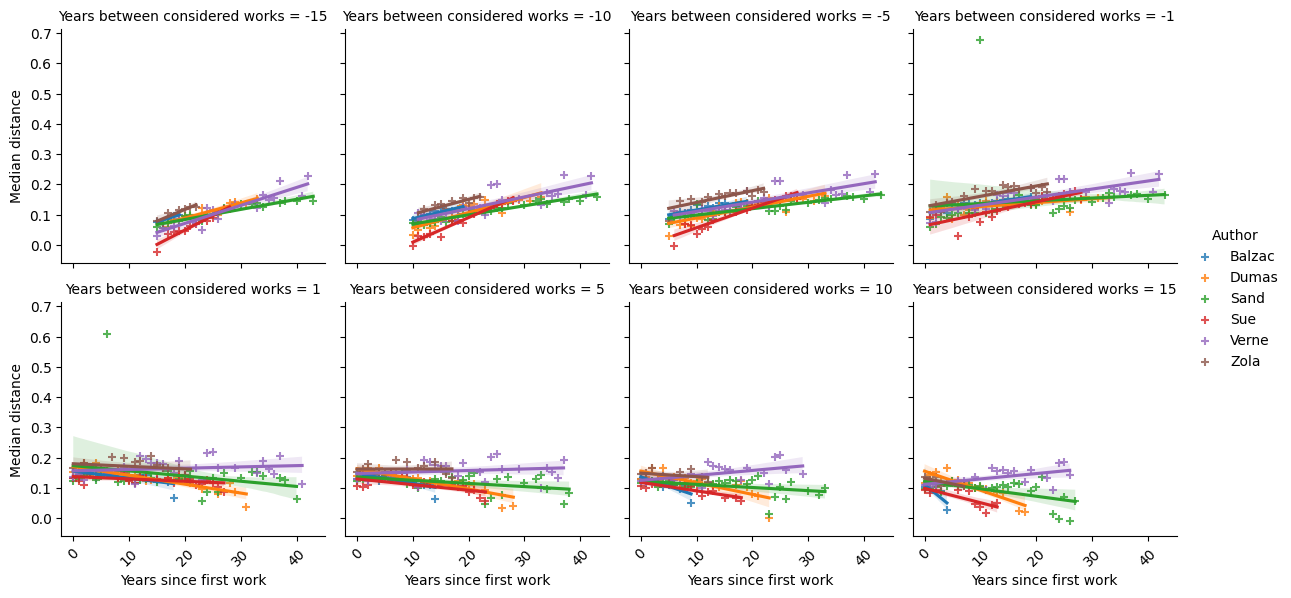

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assume df is your DataFrame
df['Year (Relative to start of career)'] = df.groupby("Author")["Date"].transform(lambda x: x - x.min())

# Create a FacetGrid with one facet per 'gap' value
g = sns.FacetGrid(df[df.Gap != "random"], col="Gap", hue="Author", sharey=True, sharex=True, col_wrap=4)

# Map a lineplot to each facet
g.map(sns.regplot, "Year (Relative to start of career)", "Distance", marker="+")

# Add a legend
g.add_legend()

# Rotate x-axis labels for better readability (optional)
for ax in g.axes.flat:
    ax.set_xlabel("Years since first work")
    ax.set_ylabel("Median distance")
    # ax.set_ylim(0, 1.05)
    for label in ax.get_xticklabels():
        label.set_rotation(45)

g.set_titles(col_template="Years between considered works = {col_name}")

# Adjust layout
# g.tight_layout()

plt.savefig("normalized_plot_bdi_distance.png", dpi=300, bbox_inches='tight')
plt.show()


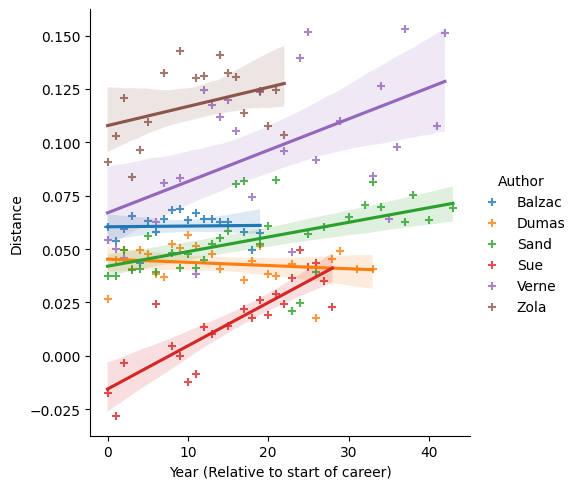

In [10]:
sns.lmplot(data=df[df.Gap=="random"], x="Year (Relative to start of career)", y="Distance", hue="Author", markers="+")
# plt.ylim(0, 1.05)
plt.savefig("normalized_bdi_control_distance.png", dpi=300, bbox_inches='tight')
plt.show()


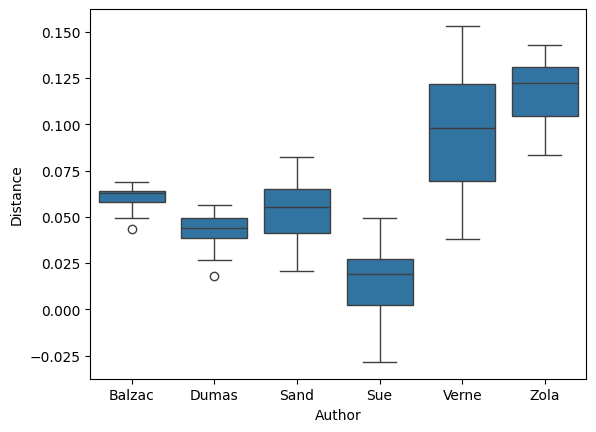

In [11]:

sns.boxplot(data=df[df.Gap=="random"], y="Distance", x="Author")
# plt.ylim(0, 1.05)
plt.savefig("normalized_bdi_control_distrib_distance.png", dpi=300, bbox_inches='tight')